# About

This Jupyter notebook contains the beginnings of our analysis code for the [PCAWG](https://dcc.icgc.org/pcawg) infrastructure paper.  This paper describes our efforts to run the core analysis for the project, namely the alignment workflow with 3 variant calling workflows.  We built various infrastructure components that let us do this in a distributed way across many (14) cloud and HPC environments.

The main text of the paper is currently in a private Google document.  This notebook will be used (maybe) to generate our figures if I can figure out how to program in Python!


In [22]:
%matplotlib inline

problem1
problem1
problem1
problem1
problem1
problem1
problem1
problem1
problem1
problem1
problem1
Done
[25.940833333333334, 24.923055555555557, 24.314444444444444, 22.222777777777775, 166.63888888888889, 207.33583333333334, 177.6461111111111, 123.43527777777778, 27.604444444444443, 33.033055555555556, 58.16138888888889, 102.1125, 11.976944444444445, 14.827222222222222, 18.99361111111111, 21.55, 179.44361111111112, 38.57472222222222, 46.39472222222222, 39.035555555555554, 52.78277777777778, 39.12444444444444, 99.57166666666667, 97.95083333333334, 157.02305555555554, 165.63972222222222, 27.930555555555554, 30.365000000000002, 23.834722222222222, 99.18805555555556, 17.284444444444443, 104.12638888888888, 39.531388888888884, 177.48638888888888, 36.75833333333333, 36.29638888888889, 32.93333333333333, 75.955, 29.02138888888889, 28.835277777777776, 49.52861111111111, 33.94694444444444, 66.8963888888889, 43.41916666666667, 38.31388888888889, 36.63111111111111, 45.27055555555555, 35.033055555

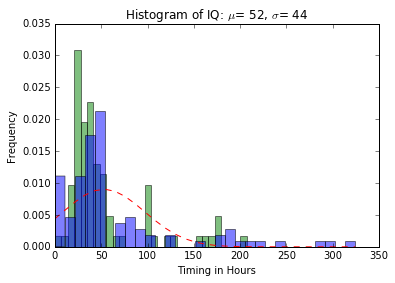

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import gzip
from io import StringIO
from io import BytesIO
import urllib
import json
import statistics
import traceback
import sys

# file content
file_content = ""

# https://github.com/ICGC-TCGA-PanCancer/pcawg-infrastructure-paper/raw/develop/donor_p_151215020209.small.jsonl.gz
# http://pancancer.info/gnos_metadata/latest/donor_p_151215020209.jsonl.gz
request = urllib.request.Request('https://github.com/ICGC-TCGA-PanCancer/pcawg-infrastructure-paper/raw/develop/donor_p_151215020209.small.jsonl.gz')
request.add_header('Accept-encoding', 'gzip')
response = urllib.request.urlopen(request)
buf = BytesIO( response.read())
f = gzip.GzipFile(fileobj=buf)
file_content = f.read()

# normal list

bwa_normal_timing_list = []
bwa_tumor_timing_list = []

for line in file_content.splitlines():
    json_struct = json.loads(line.decode(encoding='UTF-8'))
    #print(json_struct)
    #print(json_struct['normal_specimen'])
    try:
        bwa_normal_timing = 0
        for timing in json_struct['normal_specimen']['alignment']['timing_metrics'] :
            #print(timing['metrics']['bwa_timing_seconds'])
            bwa_normal_timing += timing['metrics']['bwa_timing_seconds']
        #print(bwa_normal_timing)
        bwa_normal_timing_list.append(bwa_normal_timing/60/60)
    except:
        pass
    try:
        bwa_tumor_timing = 0
        for aligned_tumor in json_struct['aligned_tumor_specimens'] :
            for timing in aligned_tumor['alignment']['timing_metrics'] :
                bwa_tumor_timing += timing['metrics']['bwa_timing_seconds']
        #print(bwa_tumor_timing)
        bwa_tumor_timing_list.append(bwa_tumor_timing/60/60)
    except Exception as err:
        pass
    
print("Done")
#print(bwa_normal_timing_list)
#print(bwa_tumor_timing_list)

# histogram
mu = statistics.mean(bwa_normal_timing_list) # mean of distribution
sigma = statistics.stdev(bwa_normal_timing_list) # standard deviation of distribution
num_bins = 30
n, bins, patches = plt.hist(bwa_normal_timing_list, num_bins, normed=1, facecolor='green', alpha=0.5)
n, bins, patches = plt.hist(bwa_tumor_timing_list, num_bins, normed=1, facecolor='blue', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Timing in Hours')
plt.ylabel('Frequency')
plt.title(r"Histogram of IQ: $\mu$=%3d, $\sigma$=%3d" % (mu, sigma))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()